# Problem statement

Dataset : ​ https://drive.google.com/open?id=16RK8_Fsfci2zopgCwuE4Pp49bZCg-bdS
The data is from a company that runs bike-sharing in the Bay Area, USA. There are stations
with docks and bikes (cycles). A user can pay and use the bikes. Once he/she is done, they
return the bike to any station they want. There are 2 types of users: ​ Customers​ and
Subscribers​ . Currently, customers are charged USD 2 per hr and subscribers are charged USD 10 per
month.
The company wants to rethink its pricing strategy for only the ​ Customer ​ user base. They are
also facing a problem of rebalancing the bikes across stations. We’d like you to come up with a
recommendation for either of the two problems above. As part of the solution, you would want to
perform the following tasks:
- Data exploration with trends, anomalies, interesting patterns, etc
- Derive insights from the analysis done
- Recommend a differential pricing strategy to increase demand for bikes
OR
Recommend a rebalancing strategy to optimally position the supply of bikes
geographically (Cost of a truck carrying 20 bikes is USD 15 per km travelled)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

## Oberving the structure of data

We will convert csv files to pandas dataframe and print head abd tail to see the structure of the data sets
I have splitted the status.csv into smaller files because it's size was too large to be processed on a notebook.


In [5]:
station = pd.read_csv("station.csv")
status = pd.read_csv("xkq.csv")
trip = pd.read_csv("trip.csv")
weather = pd.read_csv("weather.csv")

### Station.csv

In [12]:
print("Shape of station data: \n", station.shape)
print("Head of station data: \n", station.head(5))

Shape of station data: 
 (70, 7)
Head of station data: 
    id                               name        lat        long  dock_count  \
0   2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1   3              San Jose Civic Center  37.330698 -121.888979          15   
2   4             Santa Clara at Almaden  37.333988 -121.894902          11   
3   5                   Adobe on Almaden  37.331415 -121.893200          19   
4   6                   San Pedro Square  37.336721 -121.894074          15   

       city installation_date  
0  San Jose          8/6/2013  
1  San Jose          8/5/2013  
2  San Jose          8/6/2013  
3  San Jose          8/5/2013  
4  San Jose          8/7/2013  


### Status.csv (splitted)

In [13]:
print("Shape of status data: \n ", status.shape)
print("Head of status data: \n", status.head(5))

Shape of status data: 
  (249999, 4)
Head of status data: 
    76  4  15  2014-12-20 02:26:02
0  76  4  15  2014-12-20 02:27:02
1  76  4  15  2014-12-20 02:28:02
2  76  4  15  2014-12-20 02:29:01
3  76  4  15  2014-12-20 02:30:02
4  76  4  15  2014-12-20 02:31:01


### Trip.csv

In [14]:
print("Shape of trip data: \n ", trip.shape)
print("Head of trip data: \n", trip.head(5))

Shape of trip data: 
  (669959, 11)
Head of trip data: 
      id  duration       start_date        start_station_name  \
0  4576        63  8/29/2013 14:13  South Van Ness at Market   
1  4607        70  8/29/2013 14:42        San Jose City Hall   
2  4130        71  8/29/2013 10:16   Mountain View City Hall   
3  4251        77  8/29/2013 11:29        San Jose City Hall   
4  4299        83  8/29/2013 12:02  South Van Ness at Market   

   start_station_id         end_date          end_station_name  \
0                66  8/29/2013 14:14  South Van Ness at Market   
1                10  8/29/2013 14:43        San Jose City Hall   
2                27  8/29/2013 10:17   Mountain View City Hall   
3                10  8/29/2013 11:30        San Jose City Hall   
4                66  8/29/2013 12:04            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  
0              66      520        Subscriber    94127  
1              10      661        Subscriber    9

### Weather.csv

In [15]:
print("Shape of weather data: \n ", weather.shape)
print("Head of weather data: \n", weather.head(5))

Shape of weather data: 
  (3665, 24)
Head of weather data: 
         date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0  8/29/2013               74.0                68.0               61.0   
1  8/30/2013               78.0                69.0               60.0   
2  8/31/2013               71.0                64.0               57.0   
3   9/1/2013               74.0                66.0               58.0   
4   9/2/2013               75.0                69.0               62.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             61.0              58.0             56.0          93.0   
1             61.0              58.0             56.0          90.0   
2             57.0              56.0             54.0          93.0   
3             60.0              56.0             53.0          87.0   
4             61.0              60.0             58.0          93.0   

   mean_humidity  min_humidity   ...     mean_visibility_miles  \
0

## Visualizing

### Number of docks per location

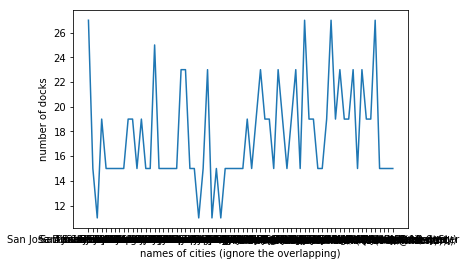

average number of docks 17.65714285714286
maximum number of docks 27
minimum number of docks 11
maximum number of docks are at:  0     San Jose Diridon Caltrain Station
49                      2nd at Townsend
55                       Market at 10th
65                    Market at Sansome
Name: name, dtype: object
minimum number of docks are at:  2               Santa Clara at Almaden
25    Castro Street and El Camino Real
28              University and Emerson
30                Cowper at University
Name: name, dtype: object


In [33]:
plt.plot(station['name'], station['dock_count'])
plt.xlabel("names of cities (ignore the overlapping)")
plt.ylabel("number of docks")
plt.show()

print("average number of docks", np.mean(station['dock_count']))
print("maximum number of docks", np.max(station['dock_count']))
print("minimum number of docks", np.min(station['dock_count']))


print("maximum number of docks are at: ", station['name'][station.dock_count == np.max(station['dock_count'])])
print("minimum number of docks are at: ", station['name'][station.dock_count == np.min(station['dock_count'])])



In [35]:
print("cities where opearated: ")
all_cities = set(station['city'])
print(all_cities)

cities where opearated: 
{'Mountain View', 'Palo Alto', 'Redwood City', 'San Francisco', 'San Jose'}


city wise analysis


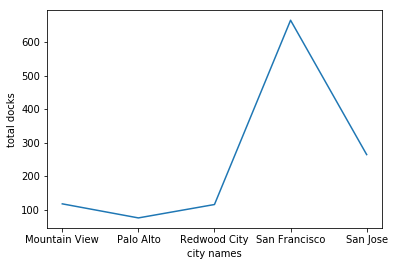

In [40]:
print("city wise analysis")

y = []
x = []
for c in all_cities:
    y.append(np.sum(station['dock_count'][station.city == c]))
    x.append(c)
plt.plot(x,y)
plt.xlabel("city names")
plt.ylabel("total docks")
plt.show()
    

### Trip and user type analysis


In [41]:
print(trip.head(1))

     id  duration       start_date        start_station_name  \
0  4576        63  8/29/2013 14:13  South Van Ness at Market   

   start_station_id         end_date          end_station_name  \
0                66  8/29/2013 14:14  South Van Ness at Market   

   end_station_id  bike_id subscription_type zip_code  
0              66      520        Subscriber    94127  


In [43]:
print("mean duration of all cities: ", np.mean(trip['duration']))
print("median duration of all cities: ", np.median(trip['duration']))
print("min duration of all cities: ", np.min(trip['duration']))
print("max duration of all cities: ", np.max(trip['duration']))

mean duration of all cities:  1107.9498461846172
median duration of all cities:  517.0
min duration of all cities:  60
max duration of all cities:  17270400


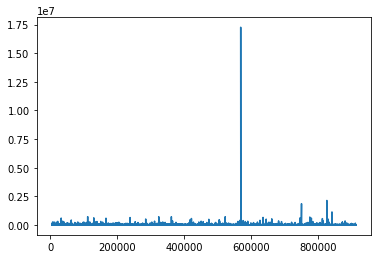

In [45]:
plt.plot(trip['id'],trip['duration'], '-')
plt.show()

In [60]:
print("Total rides: ", trip.shape[0])
print("Types of customers: ", set(trip['subscription_type']))
print("Total rides by suscribers", len(trip['id'][trip.subscription_type == 'Subscriber']))
print("Total rides by Customer", len(trip['id'][trip.subscription_type != 'Subscriber']))

print("percentage of rides by subscribers: ",56674600/669959)

Total rides:  669959
Types of customers:  {'Subscriber', 'Customer'}
Total rides by suscribers 566746
Total rides by Customer 103213
percentage of rides by subscribers:  84.59413187971204


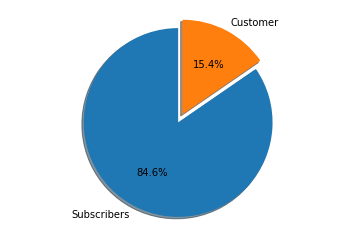

In [61]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Subscribers', 'Customer'
sizes = [566746, 103213]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [67]:
print("mean duration of rides by subscribers: ", np.mean(trip['duration'][trip.subscription_type == 'Subscriber']))
print("mean duration of rides by customers: ", np.mean(trip['duration'][trip.subscription_type != 'Subscriber']))

mean duration of rides by subscribers:  590.0488561013223
mean duration of rides by customers:  3951.761328514819


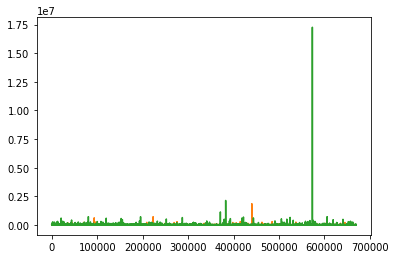

In [68]:
plt.plot(trip['duration'][trip.subscription_type == 'Subscriber'], 'C1', label = 'subscriber')
plt.plot(trip['duration'][trip.subscription_type != 'Subscriber'], 'C2', label = 'customer')
plt.show()

In [76]:
print("Number of rides by city: ")
print("=======================================================================")

all_c = list(set(trip['start_station_name']))
avg_duration = []
no_rides = []
for c in all_c:
    r = len(trip['id'][trip.start_station_name == c])
    p = np.mean(trip['duration'][trip.start_station_name == c])
    print(c, "---->", r, "rides and average duration is: ", p)
    avg_duration.append(p)
    no_rides.append(r)

Number of rides by city: 
Powell Street BART ----> 18378 rides and average duration is:  1392.8706605724235
Paseo de San Antonio ----> 2233 rides and average duration is:  1342.0470219435736
San Salvador at 1st ----> 1692 rides and average duration is:  1278.7482269503546
Rengstorff Avenue / California Street ----> 1129 rides and average duration is:  4174.082373782108
Commercial at Montgomery ----> 11888 rides and average duration is:  782.2055854643338
San Francisco City Hall ----> 4535 rides and average duration is:  1748.4754134509371
Mountain View City Hall ----> 2984 rides and average duration is:  1318.6705764075068
Post at Kearny ----> 6960 rides and average duration is:  984.5405172413793
California Ave Caltrain Station ----> 1026 rides and average duration is:  4628.005847953216
Mezes Park ----> 341 rides and average duration is:  1668.7272727272727
2nd at Folsom ----> 15940 rides and average duration is:  581.7098494353827
Market at Sansome ----> 24172 rides and average dura

In [81]:
print("max rides are from: ", all_c[no_rides.index(max(no_rides))], "equal to: ", max(no_rides), "rides")
print("min rides are from: ", all_c[no_rides.index(min(no_rides))], "equal to: ", min(no_rides), "rides")

max rides are from:  San Francisco Caltrain (Townsend at 4th) equal to:  49092 rides
min rides are from:  San Jose Government Center equal to:  23 rides


variation of number of rides by start station: 


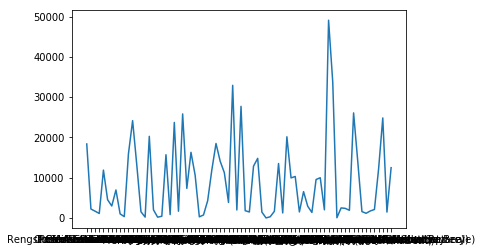

In [84]:
print("variation of number of rides by start station: ")
plt.plot(all_c, no_rides)
plt.show()

In [87]:
print("max duration rides are from: ", all_c[avg_duration.index(max(avg_duration))])
print("min duration rides are from: ", all_c[avg_duration.index(min(avg_duration))])

max duration rides are from:  University and Emerson
min duration rides are from:  2nd at Folsom


variation of mean of ride duration by start station: 


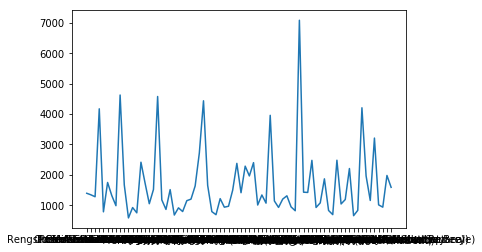

In [85]:
print("variation of mean of ride duration by start station: ")
plt.plot(all_c, avg_duration)
plt.show()

## Observations

- There are far more number of rides by  subscibers than customers with a staggering percentage of 84 percent
- However, customers tend to ride for longer than subscibers with an average duration of 3951 as compared to 590 by subscribers.
- SF has a largest avalaibility of docks where as Palo alto has the least
- Majority of the rides are from  San Francisco Caltrain (Townsend at 4th) which is around 49092 rides
- San Jose Government Center is struggiling in terms of number of rides having only 23 rides
- Travellers from University and Emerson tend to travel for longest and travellers from  2nd at Folsom travel for the least duration.


## Pricing strategy

Basically, price is always calculated on basis of two simple factors, demand and supply.
For a dynamic price, the indicators should be: 
- number of docks available
- number of rides from the station
- average duration of rides from the station

More the number of docks, less the ride charge surge and vice-versa. More the number of rides from the station, more the base price and vice-versa. Similarly, More the average duration of rides from the station, more the hourly price.

### code